### Perform KMeans clustering for the airlines data to obtain optimum number of clusters.

In [ ]:
#Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the data
df = pd.read_excel(r'D:\360digi\DS\Sharath\KMeans_Clustering\handson\Dataset_Assignment Clustering_K Means\EastWestAirlines.xlsx', sheet_name = 1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#rename the column
df = df.rename(columns = {'Award?':'Award'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [84]:
df.shape

(3999, 12)

### EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

#### Data Preprocessing

In [8]:
# Drop the unwanted features
df1 = df.drop(["ID#"], axis = 1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [10]:
#Checking Null Values
df1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [11]:
#Handling duplicates
duplicate = df1.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool


1

In [12]:
sum(duplicate)

1

In [13]:
duplicate.unique()

array([False,  True])

In [14]:
#Remove duplicates
df = df.drop_duplicates()

### Outlier Analysis

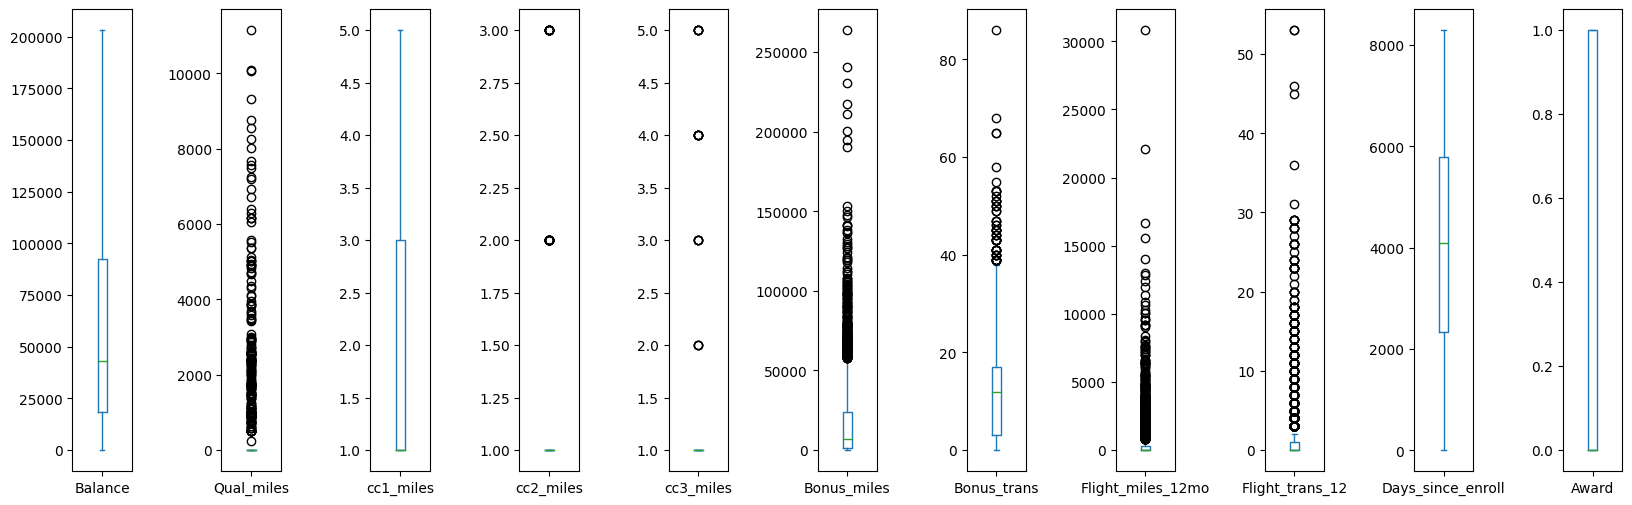

In [18]:
#Box plot visualization to view the outliers.

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Balance, Qual_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12 columns have outliers


### Winsorizaton

In [17]:
# Winsorization for "Balance" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Balance'])

df1['Balance'] = winsor.fit_transform(df1[['Balance']])


In [19]:
# Winsorization for "Bonus_miles" column
winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['Bonus_miles'])

df1['Bonus_miles'] = winsor.fit_transform(df1[['Bonus_miles']])

In [20]:
# Winsorization for "Bonus_trans" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Bonus_trans'])

df1['Bonus_trans'] = winsor.fit_transform(df1[['Bonus_trans']])

In [21]:
# Winsorization for "Flight_miles_12mo" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Flight_miles_12mo'])

df1['Flight_miles_12mo'] = winsor.fit_transform(df1[['Flight_miles_12mo']])



In [22]:
# Winsorization for "Flight_trans_12" column

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables=['Flight_trans_12'])

df1['Flight_trans_12'] = winsor.fit_transform(df1[['Flight_trans_12']])

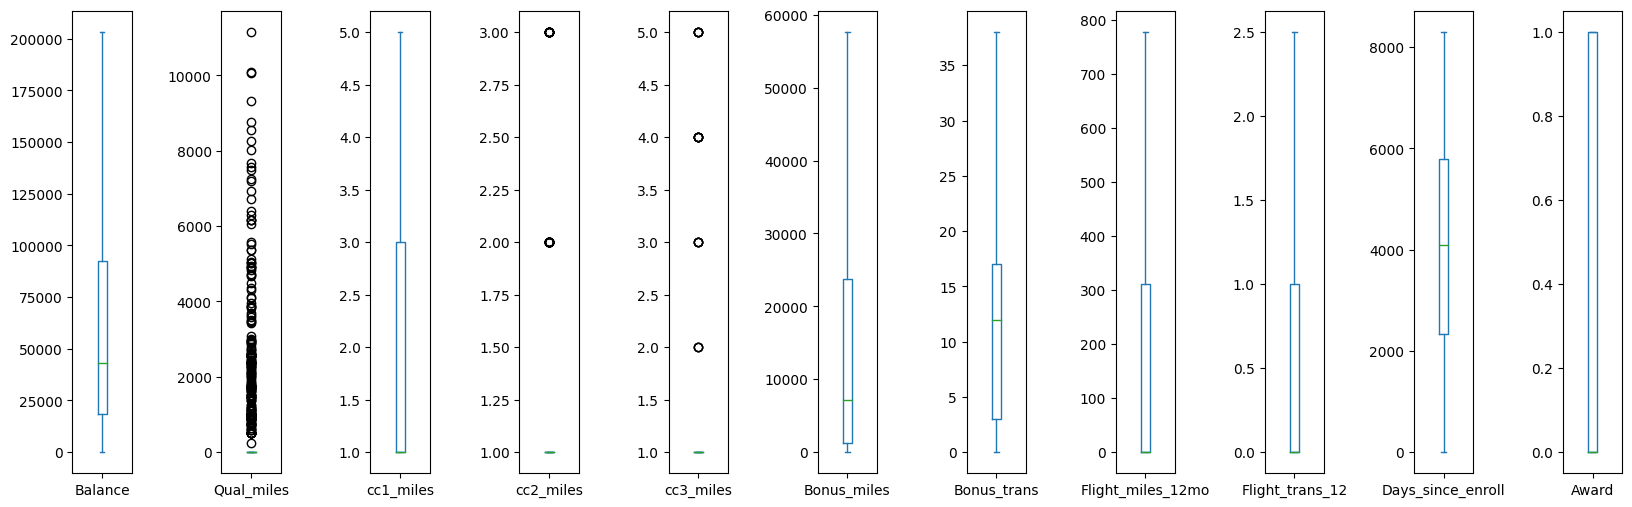

In [23]:
#Box plot visualization to view after the removal of outliers.

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()

In [ ]:
# Winsorization technique cannot be applied to columns 'Qual_miles, cc2_miles, cc3_miles ' because the variation in data is low. 
# We consider these columns 'Qual_miles, cc2_miles, cc3_miles ' as it is and proceed to scale the data.

### Scaling with Normalization - MinMaxScaler

In [34]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [35]:
new_features = df1.columns

In [36]:
preprocess_pipeline1 = ColumnTransformer([('scale', scale_pipeline, new_features)], 
                                         remainder = 'passthrough') # Skips the transformations for remaining columns

In [37]:
processed1 = preprocess_pipeline1.fit(df1)

In [38]:
df_new = pd.DataFrame(processed1.transform(df1))

In [39]:
df_new.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.313793,0.012927,0.264879,0.007252,0.003063,0.267426,0.301858,0.229010,0.236609,0.496330,0.370343
std,0.288722,0.069399,0.344230,0.073825,0.048810,0.313655,0.239871,0.379007,0.377931,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091170,0.000000,0.000000,0.000000,0.000000,0.021692,0.078947,0.000000,0.000000,0.280685,0.000000
50%,0.212072,0.000000,0.000000,0.000000,0.000000,0.124440,0.315789,0.000000,0.000000,0.493610,0.000000
75%,0.454702,0.000000,0.500000,0.000000,0.000000,0.413015,0.447368,0.400000,0.400000,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clustering Model Building

## KMeans Clustering

In [40]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_new)
    TWSS.append(kmeans.inertia_)

TWSS

[2590.740270198411,
 1944.3224245719894,
 1622.6571335310582,
 1367.6838546636695,
 1192.5661189963469,
 1045.8449924324143,
 971.6968487632172]

Text(0, 0.5, 'total_within_SS')

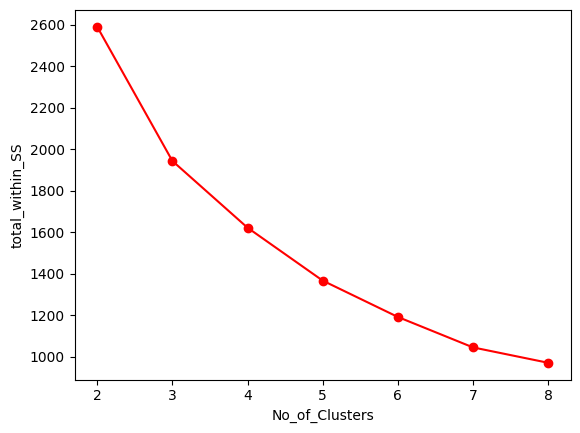

In [42]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

## Using KneeLocator

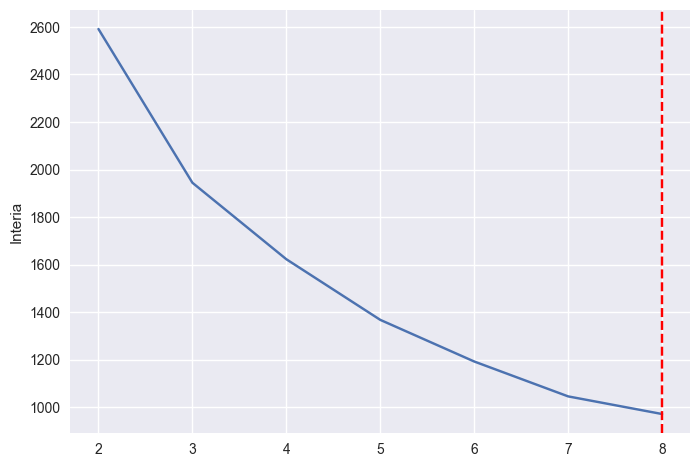

In [43]:
List = []

for k in range(2,9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10)
    kmeans.fit(df_new)
    List.append(kmeans.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(2,9), List, curve = 'convex')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2,9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--') 
plt.show()

In [ ]:
# Detecting the best k=3 using TWSS value from scree plot

In [44]:
model = KMeans(n_clusters = 3)
yy = model.fit(df_new)

In [45]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
mb = pd.Series(model.labels_)

In [47]:
df1['clust'] = mb

In [48]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,1,2


In [49]:
x = df1.iloc[:,:].values

### 3D Scatter Plot

In [50]:
# Cluster according to any three Attributes

<IPython.core.display.Javascript object>


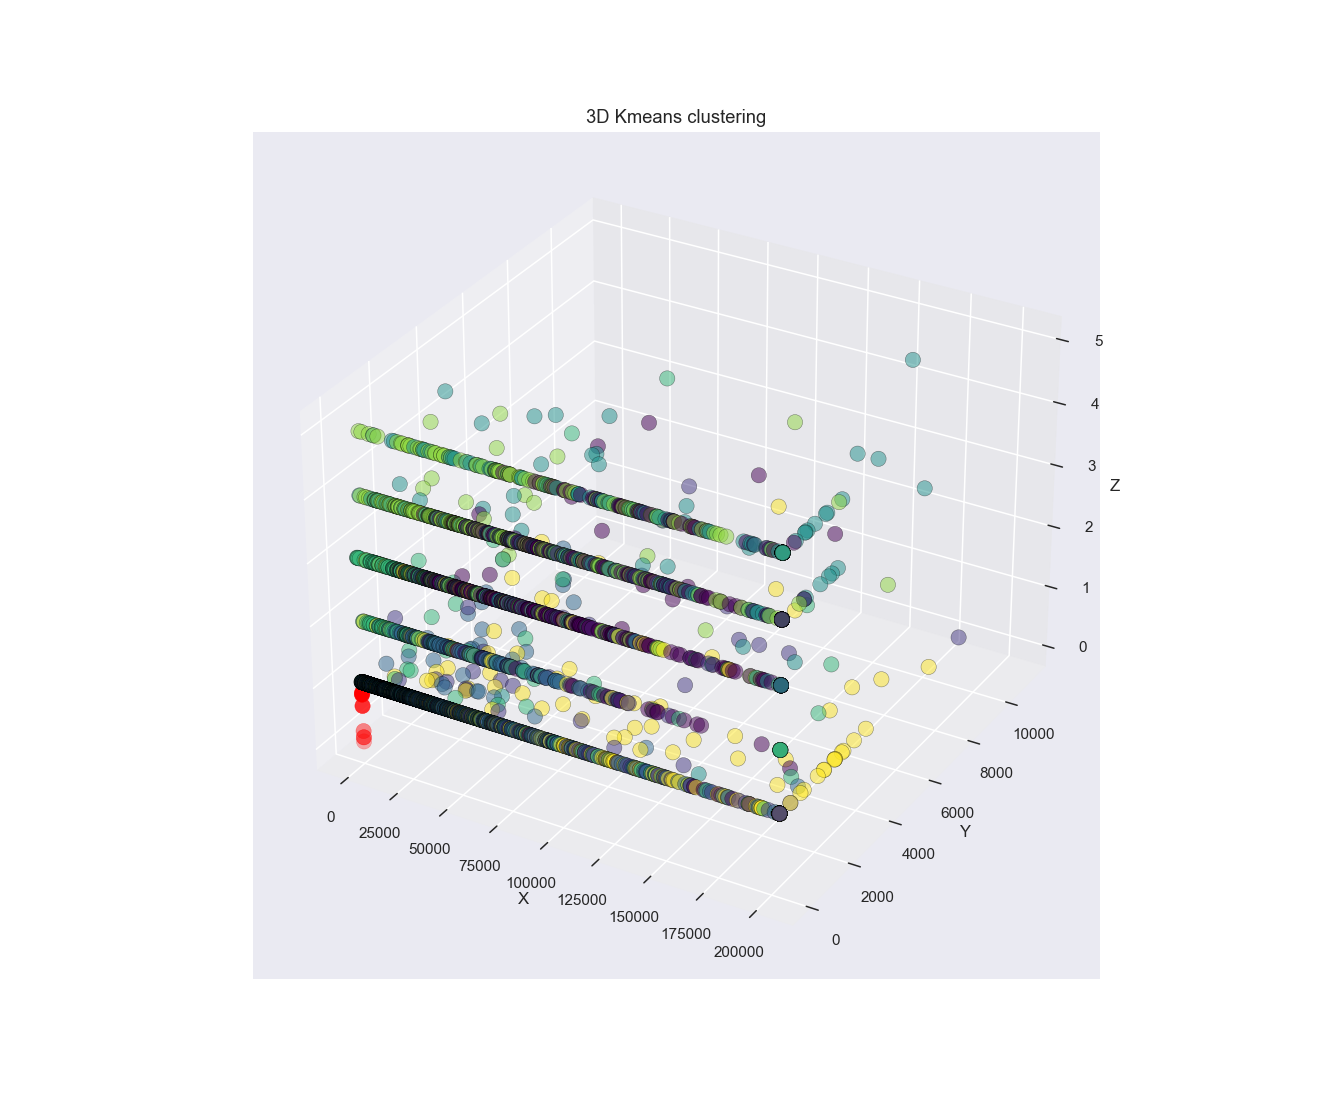

In [69]:
# plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c = model.labels_, cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker = 'o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

# Cluster Evaluation

#### Silhouette Coefficient:

In [52]:
from sklearn import metrics

In [53]:
metrics.silhouette_score(df_new, model.labels_)

0.3695912951640934

#### Calinski Harabasz:

In [54]:
metrics.calinski_harabasz_score(df_new, model.labels_)

1913.6854021533964

#### Davies-Bouldin Index:

In [55]:
metrics.davies_bouldin_score(df_new, model.labels_)

1.221086136914728

### Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [81]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_new)
    score = silhouette_score(df_new, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])
    
    

In [82]:
silhouette_coefficients

[[2, 0.3516957558974023],
 [3, 0.36919934602428545],
 [4, 0.3427143158415342],
 [5, 0.36011299480800807],
 [6, 0.3731913586077405],
 [7, 0.3800977758397147],
 [8, 0.2935406086807662],
 [9, 0.29390133031070986],
 [10, 0.2803239707072199]]

In [83]:
sorted(silhouette_coefficients, reverse = True, key = lambda x: x[1])

[[7, 0.3800977758397147],
 [6, 0.3731913586077405],
 [3, 0.36919934602428545],
 [5, 0.36011299480800807],
 [2, 0.3516957558974023],
 [4, 0.3427143158415342],
 [9, 0.29390133031070986],
 [8, 0.2935406086807662],
 [10, 0.2803239707072199]]

### Shilhouette Coeffficients shows, the number of clusters k = 7 as the best value.

In [62]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,1,2


In [63]:
# Aggregate mean of each cluster
df1.iloc[:, :].groupby(df1.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0,50611.796014,68.232802,1.651025,1.015034,1.007289,8958.450000,8.410934,29.601595,0.118679,3776.131663,0.000000
1,60105.545000,134.324211,2.727368,1.010526,1.012632,23438.991316,13.553684,61.271579,0.217895,4556.287368,0.996842
2,101659.970141,350.040984,2.366511,1.017564,1.024590,23064.019321,17.017564,689.532787,2.222482,4511.752927,0.625293


In [72]:
model1 = KMeans(n_clusters = 7)
yy = model1.fit(df_new)

In [73]:
model1.labels_

array([0, 0, 0, ..., 6, 4, 0])

In [74]:
mb = pd.Series(model1.labels_)

In [75]:
df1['cluster'] = mb

In [76]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,cluster
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,0,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,0,0,0
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,1,2,1


In [78]:
metrics.silhouette_score(df_new, model1.labels_)

0.3799782349551392

In [79]:
metrics.calinski_harabasz_score(df_new, model1.labels_)

1756.346574489303

In [80]:
metrics.davies_bouldin_score(df_new, model1.labels_)

1.1060372801105325

In [85]:
# Aggregate mean of each cluster
df1.iloc[:, :].groupby(df1.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
cluster,,,,,,,,,,,,
0,32260.045543,61.184109,1.083979,1.018734,1.000646,2792.968346,5.835917,7.595607,0.050388,3535.815245,0.000000,0.000000
1,126967.837230,322.607914,4.280576,1.007194,1.057554,48498.321942,25.830935,682.330935,2.165468,5117.428058,0.877698,1.924460
2,86472.618946,114.766382,4.179487,1.002849,1.034188,43370.832621,18.236467,51.578348,0.227920,5066.119658,1.000000,1.000000
3,106529.968966,83.713793,3.429310,1.005172,1.031034,28836.939655,16.403448,41.932759,0.137931,4526.763793,0.000000,0.143103
4,67076.602528,201.092697,1.356742,1.008427,1.000000,6697.342697,9.862360,622.445225,1.981742,3828.480337,0.000000,1.382022
5,88768.200994,458.434659,1.363636,1.031250,1.005682,11594.046165,13.423295,667.448864,2.161932,4405.602273,1.000000,1.883523
6,42153.963951,131.312734,1.777154,1.016854,1.000000,10126.438202,10.308989,21.799625,0.110487,4225.823970,1.000000,1.000000
